In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
df = pd.read_csv('Airbnb Berlin.csv')

/var/folders/99/1tpq9y050p56v6cs65y55f_00000gn/T/ipykernel_34619/680906998.py:6: DtypeWarning: Columns (19,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb Berlin.csv')


Data Overview

In [2]:
df.head()

,index,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
0,0,58660447.0,01-03-16,14876562.0,Dennis,"Very nice, clean appartement! Josh was really ...",10002699,https://www.airbnb.com/rooms/10002699,Trendy and peaceful KreuzkÃ¶lln,44696672,...,01-03-16,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,f
1,1,NaN,NaN,NaN,NaN,NaN,10002922,https://www.airbnb.com/rooms/10002922,Sehr zentrale Wohnung in Berlin,45848709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f
2,2,58663795.0,01-03-16,49367757.0,Andreea,Aki is really nice and friendly. We had an ama...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02-12-17,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
3,3,59003619.0,01-05-16,46694292.0,Sasha,Aki is a very nice dude with a clean place in ...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02-12-17,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f
4,4,66845661.0,03-25-16,54542819.0,Yohana,Aki's place was easy to find and located in th...,10006647,https://www.airbnb.com/rooms/10006647,Very central and very quite,40791092,...,02-12-17,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,f


In [3]:
df.tail()

,index,Review ID,review_date,Reviewer ID,Reviewer Name,Comments,Listing ID,Listing URL,Listing Name,Host ID,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
456956,456956,42820790.0,08-16-15,29701880.0,MichÃ¨le,Unsere Ferien in dieser wunderschÃ¶nen Wohnung...,999465,https://www.airbnb.com/rooms/999465,Familyhome for your vacation,5494219,...,08-29-15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f
456957,456957,44757189.0,08-29-15,32004492.0,Mira,"Die Wohnung in einer sehr guten Lage, besonder...",999465,https://www.airbnb.com/rooms/999465,Familyhome for your vacation,5494219,...,08-29-15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f
456958,456958,89152874.0,07-27-16,23295563.0,Naomi,"Tiene todo lo que se necesita, es amplio y cÃ³...",9996186,https://www.airbnb.com/rooms/9996186,"Very nice apartment, central, Mitte",51352517,...,04-22-19,80.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f
456959,456959,141452588.0,04-03-17,4208925.0,Rowann,Isabella's place is perfect. It is in a great ...,9996186,https://www.airbnb.com/rooms/9996186,"Very nice apartment, central, Mitte",51352517,...,04-22-19,80.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f
456960,456960,441547612.0,04-22-19,4222195.0,Kay,Great located place. Kind host. Spacious and g...,9996186,https://www.airbnb.com/rooms/9996186,"Very nice apartment, central, Mitte",51352517,...,04-22-19,80.0,10.0,9.0,10.0,10.0,9.0,9.0,f,f


In [4]:
df.describe()

,index,Review ID,Reviewer ID,Listing ID,Host ID,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,...,Guests Included,Min Nights,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating
count,456961.000000,4.528050e+05,4.528050e+05,4.569610e+05,4.569610e+05,456961.000000,456961.000000,456961.000000,456018.000000,456244.000000,...,456961.000000,456961.000000,456961.000000,452242.000000,452209.000000,452211.000000,452188.000000,452205.000000,452186.000000,452185.000000
mean,228480.000000,2.210771e+08,6.741881e+07,1.172870e+07,4.225116e+07,52.512460,13.403450,3.102133,1.099039,1.216042,...,1.571178,4.945792,102.961113,94.569752,9.769029,9.502785,9.805570,9.806583,9.639045,9.426746
std,131913.422517,1.298566e+08,6.445677e+07,9.105569e+06,5.475489e+07,0.028892,0.055173,1.928835,0.337697,0.720500,...,1.076073,16.146465,96.637273,4.399786,0.473212,0.682148,0.438024,0.442631,0.528235,0.576970
min,0.000000,4.283000e+03,5.000000e+00,2.695000e+03,1.581000e+03,52.345800,13.097180,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,114240.000000,1.084257e+08,1.570784e+07,3.187735e+06,4.097958e+06,52.493450,13.376740,2.000000,1.000000,1.000000,...,1.000000,1.000000,28.000000,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,228480.000000,2.204285e+08,4.332366e+07,1.080061e+07,1.860098e+07,52.512880,13.411990,2.000000,1.000000,1.000000,...,1.000000,2.000000,75.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,342720.000000,3.276229e+08,1.060161e+08,1.873384e+07,5.751183e+07,52.532390,13.434080,4.000000,1.000000,1.000000,...,2.000000,3.000000,149.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,456960.000000,4.528262e+08,2.614011e+08,3.468232e+07,2.616142e+08,52.651670,13.757640,16.000000,8.500000,10.000000,...,16.000000,1000.000000,545.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456961 entries, 0 to 456960
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  456961 non-null  int64  
 1   Review ID              452805 non-null  float64
 2   review_date            452805 non-null  object 
 3   Reviewer ID            452805 non-null  float64
 4   Reviewer Name          452805 non-null  object 
 5   Comments               452597 non-null  object 
 6   Listing ID             456961 non-null  int64  
 7   Listing URL            456961 non-null  object 
 8   Listing Name           456756 non-null  object 
 9   Host ID                456961 non-null  int64  
 10  Host URL               456961 non-null  object 
 11  Host Name              456913 non-null  object 
 12  Host Since             456913 non-null  object 
 13  Host Response Time     398194 non-null  object 
 14  Host Response Rate     398194 non-nu

In [6]:
df.isna().sum()

index                         0
Review ID                  4156
review_date                4156
Reviewer ID                4156
Reviewer Name              4156
Comments                   4364
Listing ID                    0
Listing URL                   0
Listing Name                205
Host ID                       0
Host URL                      0
Host Name                    48
Host Since                   48
Host Response Time        58767
Host Response Rate        58767
Is Superhost                 48
neighbourhood                 0
Neighborhood Group            0
City                         33
Postal Code                7703
Country Code                  0
Country                       0
Latitude                      0
Longitude                     0
Is Exact Location             0
Property Type                 0
Room Type                     0
Accomodates                   0
Bathrooms                   943
Bedrooms                    717
Beds                         90
Square F

Dealing with Null Values and Reducing Features

In [7]:
df.drop(['Square Feet','Accuracy Rating','Overall Rating','Cleanliness Rating','Checkin Rating','Communication Rating','Location Rating','Value Rating','Business Travel Ready','Is Exact Location','Country','Country Code','Review ID','review_date','Reviewer ID','Comments','Listing Name','Listing URL','Host URL','Host Name','Host Since','Host Response Time','Host Response Rate','Neighborhood Group','City','First Review','Last Review','Reviewer Name'], axis = 1, inplace = True)

In [8]:
df = df.dropna(subset = ['Is Superhost'])

In [9]:
df.shape

(456913, 19)

In [10]:
df['Bathrooms'].fillna(df['Bathrooms'].median(), inplace = True)

In [11]:
df['Property Type'].unique()

array(['Apartment', 'House', 'Loft', 'Serviced apartment', 'Townhouse',
       'Bed and breakfast', 'Guest suite', 'Bungalow', 'Other',
       'Condominium', 'Cabin', 'Hostel', 'Houseboat', 'Boat', 'Cottage',
       'Tiny house', 'Guesthouse', 'Villa', 'Hotel', 'Tipi', 'Tent',
       'Boutique hotel', 'Resort', 'Earth house', 'Camper/RV', 'Castle',
       'Train', 'Aparthotel', 'Cave', 'Barn', 'Hut',
       'Pension (South Korea)', 'Casa particular (Cuba)', 'Treehouse',
       'Vacation home'], dtype=object)

In [12]:
df['Room Type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [13]:
df['Postal Code'].unique()

array([12047.0, 10405.0, 10178.0, 13189.0, 10963.0, 12163.0, 10437.0,
       12059.0, 10245.0, 12205.0, 12045.0, 10997.0, 10439.0, 13353.0,
       12051.0, 10779.0, 10967.0, 10961.0, 10179.0, 10999.0, nan, 13357.0,
       10317.0, 10249.0, 10407.0, 10119.0, 10969.0, 12053.0, 13355.0,
       10365.0, 10965.0, 13359.0, 12159.0, 10713.0, 10117.0, 10715.0,
       13088.0, 10587.0, 10829.0, 10719.0, 12057.0, 10115.0, 10243.0,
       12109.0, 10823.0, 10777.0, 12043.0, 10247.0, 12435.0, 13351.0,
       10785.0, 12049.0, 10435.0, 12524.0, 10711.0, 13349.0, 10559.0,
       12055.0, 10315.0, 10623.0, 12621.0, 13347.0, 10585.0, 10557.0,
       12437.0, 10827.0, 10551.0, 13053.0, 12623.0, 12589.0, 10787.0,
       14059.0, 14055.0, 12555.0, 14163.0, 10318.0, 12489.0, 12587.0,
       13086.0, 10781.0, 14169.0, 10709.0, 10589.0, 13407.0, 10825.0,
       14052.0, 14197.0, 13581.0, 14193.0, 13055.0, 12357.0, 12099.0,
       10409.0, 14050.0, 10625.0, 14195.0, 13156.0, 12249.0, 14057.0,
       12103.0,

In [14]:
df.drop(['Postal Code'], axis = 1, inplace = True)

In [15]:
df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace = True)
df['Beds'].fillna(df['Beds'].median(), inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456913 entries, 0 to 456960
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             456913 non-null  int64  
 1   Listing ID        456913 non-null  int64  
 2   Host ID           456913 non-null  int64  
 3   Is Superhost      456913 non-null  object 
 4   neighbourhood     456913 non-null  object 
 5   Latitude          456913 non-null  float64
 6   Longitude         456913 non-null  float64
 7   Property Type     456913 non-null  object 
 8   Room Type         456913 non-null  object 
 9   Accomodates       456913 non-null  int64  
 10  Bathrooms         456913 non-null  float64
 11  Bedrooms          456913 non-null  float64
 12  Beds              456913 non-null  float64
 13  Price             456913 non-null  object 
 14  Guests Included   456913 non-null  int64  
 15  Min Nights        456913 non-null  int64  
 16  Reviews           45

In [17]:
df["Price"] = [float(str(i).replace(",", "")) for i in df["Price"]]

<AxesSubplot: xlabel='Price'>

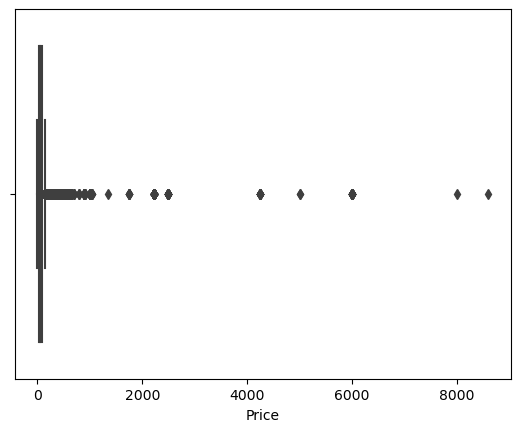

In [18]:
sns.boxplot(x=df['Price'])

In [19]:
df.describe()

,index,Listing ID,Host ID,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews
count,456913.000000,4.569130e+05,4.569130e+05,456913.000000,456913.000000,456913.000000,456913.000000,456913.000000,456913.000000,456913.000000,456913.000000,456913.000000,456913.000000
mean,228467.815164,1.172916e+07,4.225233e+07,52.512460,13.403451,3.102131,1.098842,1.215726,1.911848,69.132128,1.571203,4.945900,102.971141
std,131908.232075,9.105901e+06,5.475731e+07,0.028893,0.055174,1.928905,0.337391,0.720017,1.525271,89.674387,1.076112,16.146668,96.637371
min,0.000000,2.695000e+03,1.581000e+03,52.345800,13.097180,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,114236.000000,3.187735e+06,4.097958e+06,52.493450,13.376740,2.000000,1.000000,1.000000,1.000000,37.000000,1.000000,1.000000,28.000000
50%,228464.000000,1.080176e+07,1.860098e+07,52.512900,13.411990,2.000000,1.000000,1.000000,1.000000,53.000000,1.000000,2.000000,75.000000
75%,342694.000000,1.873563e+07,5.751183e+07,52.532390,13.434080,4.000000,1.000000,1.000000,2.000000,80.000000,2.000000,3.000000,149.000000
max,456960.000000,3.468232e+07,2.616142e+08,52.651670,13.757640,16.000000,8.500000,10.000000,22.000000,8600.000000,16.000000,1000.000000,545.000000


In [20]:
df.drop(['Listing ID'], axis = 1, inplace = True)
df.drop(['Host ID'], axis = 1, inplace = True)

In [21]:
df.duplicated(keep = 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
456956    False
456957    False
456958    False
456959    False
456960    False
Length: 456913, dtype: bool

Removing Outliers

In [22]:
q1 = np.quantile(df['Min Nights'], 0.25)
q3 = np.quantile(df['Min Nights'], 0.75) 
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

df = df[df['Min Nights'] < upper_bound]

<AxesSubplot: >

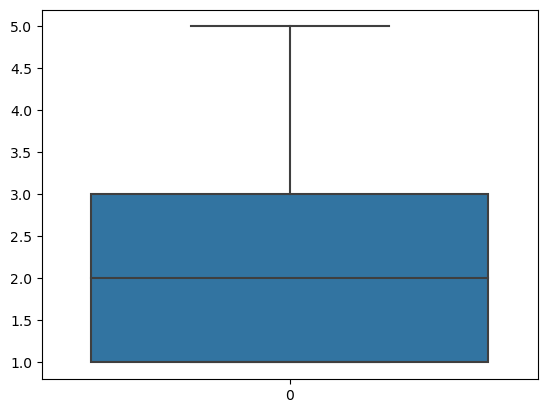

In [23]:
sns.boxplot(data = df['Min Nights'] )

In [24]:
q1 = np.quantile(df['Accomodates'], 0.25)
q3 = np.quantile(df['Accomodates'], 0.75) 
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

df = df[df['Accomodates'] < upper_bound]

<AxesSubplot: >

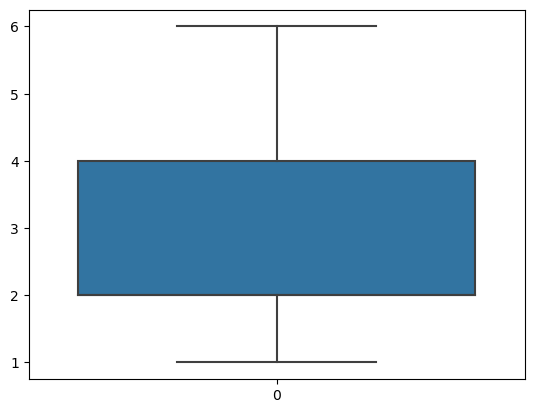

In [25]:
sns.boxplot(data = df['Accomodates'] )

In [26]:
df.describe()

,index,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews
count,401518.000000,401518.000000,401518.000000,401518.000000,401518.000000,401518.000000,401518.000000,401518.000000,401518.000000,401518.000000,401518.000000
mean,227938.176879,52.512337,13.403763,2.827906,1.075589,1.129982,1.710698,63.912460,1.458998,2.215328,106.235678
std,131626.652695,0.029040,0.055563,1.328104,0.290744,0.562074,1.098739,81.285153,0.791609,1.065309,98.870406
min,0.000000,52.345800,13.097180,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,114363.250000,52.493450,13.376910,2.000000,1.000000,1.000000,1.000000,35.000000,1.000000,1.000000,30.000000
50%,227888.500000,52.512650,13.412310,2.000000,1.000000,1.000000,1.000000,50.000000,1.000000,2.000000,77.000000
75%,341653.750000,52.532140,13.434750,4.000000,1.000000,1.000000,2.000000,79.000000,2.000000,3.000000,155.000000
max,456953.000000,52.651670,13.757640,6.000000,8.500000,9.000000,22.000000,8600.000000,16.000000,5.000000,545.000000


In [27]:
q1 = np.quantile(df['Price'], 0.25)
q3 = np.quantile(df['Price'], 0.75) 
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

df = df[df['Price'] < upper_bound]

<AxesSubplot: >

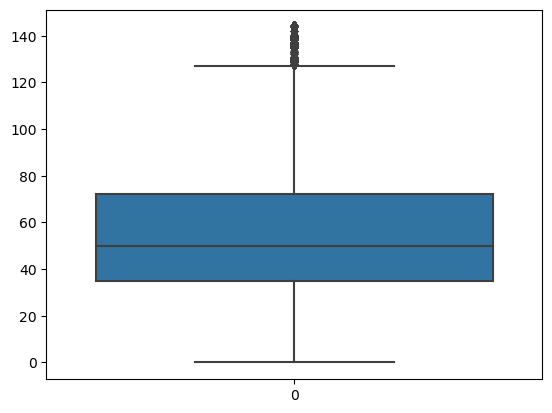

In [28]:
sns.boxplot(data = df['Price'] )

EDA

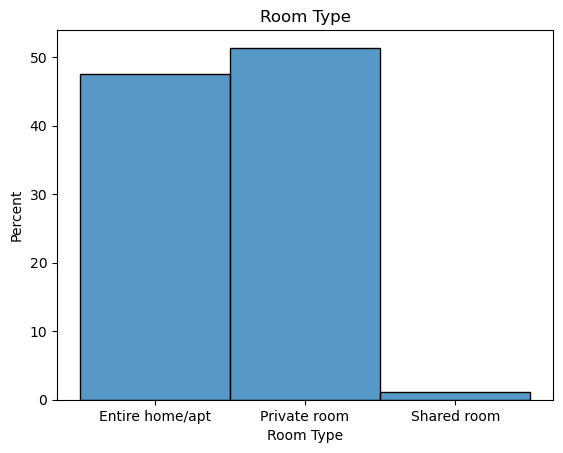

In [29]:
sns.histplot(data = df, x = 'Room Type', stat = 'percent')
plt.title('Room Type')
plt.show()

<AxesSubplot: xlabel='Is Superhost', ylabel='Percent'>

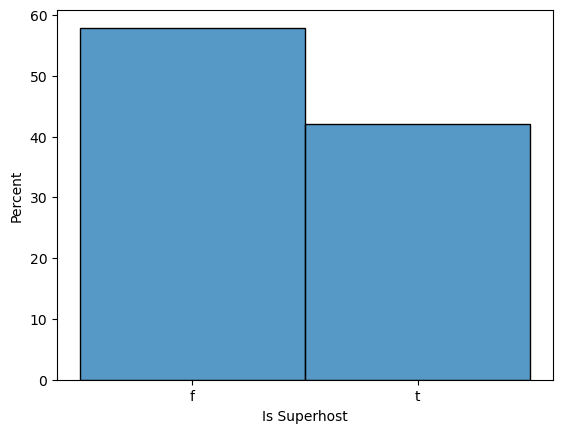

In [30]:
sns.histplot(data = df, x ='Is Superhost', stat = 'percent')

In [31]:
df.corr()

/var/folders/99/1tpq9y050p56v6cs65y55f_00000gn/T/ipykernel_34619/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews
index,1.000000,-0.014117,-0.009769,-0.003733,0.010662,0.014167,-0.013321,-0.000098,-0.023242,0.010743,0.090429
Latitude,-0.014117,1.000000,-0.084511,0.029482,-0.022846,-0.018988,0.028018,0.058538,-0.004325,-0.006895,0.070104
Longitude,-0.009769,-0.084511,1.000000,0.010923,-0.003433,0.000203,0.027311,-0.026235,0.007515,0.043465,-0.037247
Accomodates,-0.003733,0.029482,0.010923,1.000000,0.026937,0.441015,0.757632,0.513134,0.500086,0.004430,0.072900
Bathrooms,0.010662,-0.022846,-0.003433,0.026937,1.000000,0.079901,0.038949,0.046450,0.026166,-0.003205,0.001409
Bedrooms,0.014167,-0.018988,0.000203,0.441015,0.079901,1.000000,0.448429,0.300580,0.303171,0.073216,-0.000820
Beds,-0.013321,0.028018,0.027311,0.757632,0.038949,0.448429,1.000000,0.370377,0.410011,-0.007768,0.046617
Price,-0.000098,0.058538,-0.026235,0.513134,0.046450,0.300580,0.370377,1.000000,0.463416,0.124853,0.084284
Guests Included,-0.023242,-0.004325,0.007515,0.500086,0.026166,0.303171,0.410011,0.463416,1.000000,0.051508,0.057136
Min Nights,0.010743,-0.006895,0.043465,0.004430,-0.003205,0.073216,-0.007768,0.124853,0.051508,1.000000,-0.191358


/var/folders/99/1tpq9y050p56v6cs65y55f_00000gn/T/ipykernel_34619/3660129720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu')


<AxesSubplot: >

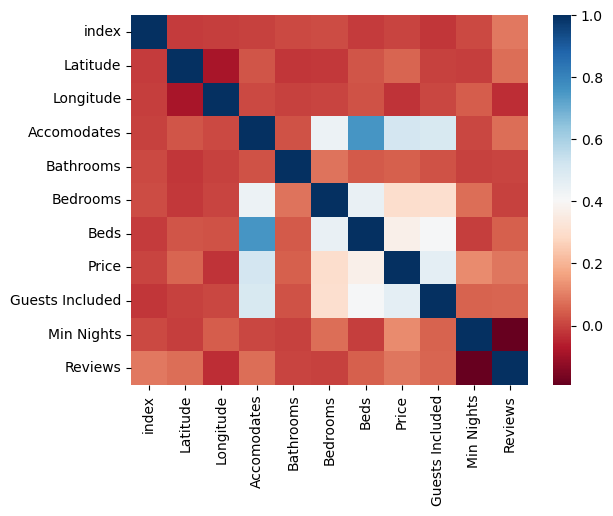

In [32]:
sns.heatmap(df.corr(), cmap='RdBu')

<AxesSubplot: xlabel='Price', ylabel='Count'>

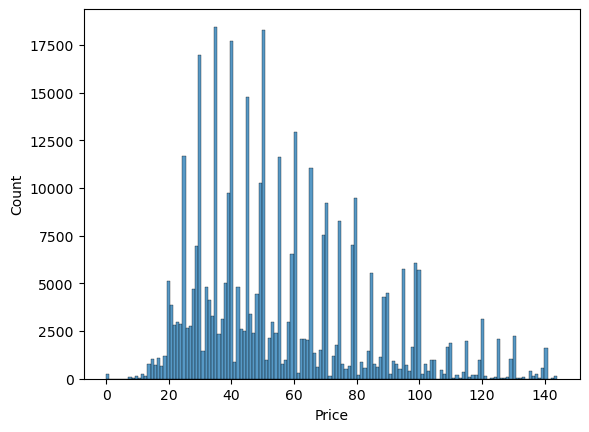

In [33]:
sns.histplot(data = df, x = 'Price', stat = 'count')

<AxesSubplot: xlabel='Room Type', ylabel='Price'>

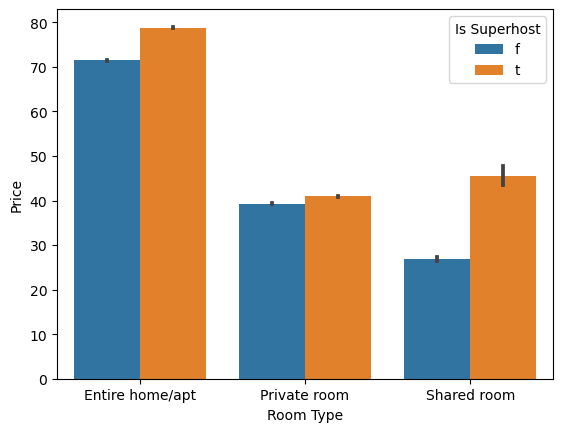

In [34]:
sns.barplot(data = df, x = 'Room Type', y = 'Price', hue = 'Is Superhost')

In [35]:
df = df[df['Beds'] < 7]

<AxesSubplot: xlabel='Beds', ylabel='Price'>

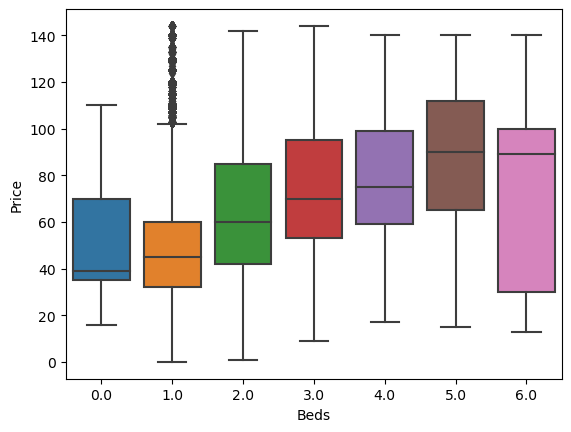

In [36]:
sns.boxplot(data = df, x = df['Beds'], y = df['Price'])

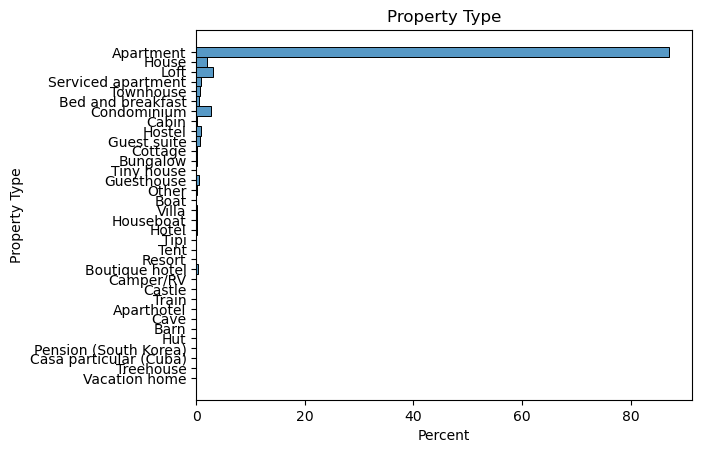

In [37]:
sns.histplot(data = df, y = 'Property Type', stat = 'percent')
plt.title('Property Type')
plt.show()

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

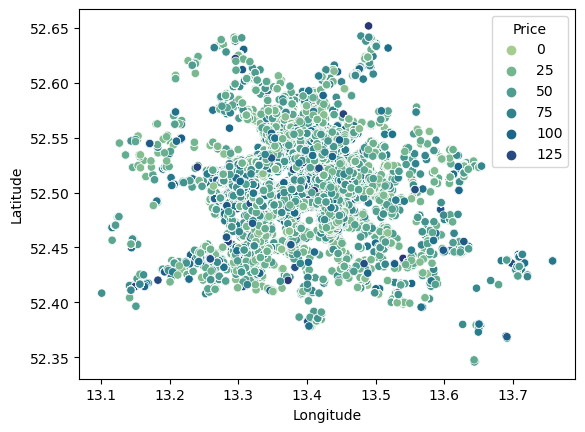

In [38]:

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'Price', palette = 'crest')

In [39]:
df.drop(['Latitude','Longitude'], axis = 1, inplace = True)

In [40]:
df['Bathrooms']= df['Bathrooms'].astype('int')
df['Bedroooms']= df['Bedrooms'].astype('int')
df['Accomodates']= df['Accomodates'].astype('int')

In [41]:
df.drop(df[df['Property Type'] != 'Apartment'].index, inplace = True)

Category Encoding


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer=make_column_transformer((OneHotEncoder(), ['Is Superhost', 'Room Type']), remainder="passthrough")
transformed = transformer.fit_transform(df)
df =  pd.DataFrame(transformed, columns=transformer.get_feature_names())


/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332843 entries, 0 to 332842
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   onehotencoder__x0_f                332843 non-null  object
 1   onehotencoder__x0_t                332843 non-null  object
 2   onehotencoder__x1_Entire home/apt  332843 non-null  object
 3   onehotencoder__x1_Private room     332843 non-null  object
 4   onehotencoder__x1_Shared room      332843 non-null  object
 5   index                              332843 non-null  object
 6   neighbourhood                      332843 non-null  object
 7   Property Type                      332843 non-null  object
 8   Accomodates                        332843 non-null  object
 9   Bathrooms                          332843 non-null  object
 10  Bedrooms                           332843 non-null  object
 11  Beds                               332843 non-null  

Mulitlinear Regression Model


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
X = df[['Beds','onehotencoder__x0_f','onehotencoder__x0_t','onehotencoder__x1_Entire home/apt','onehotencoder__x1_Private room','onehotencoder__x1_Shared room','Guests Included','Accomodates','Bedrooms']]
Y = df['Price']

In [46]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.3)

In [47]:
linreg = LinearRegression()


In [48]:
linreg.fit(x_train, y_train)


LinearRegression()

In [49]:
linreg.predict(x_test)

array([61.46386719, 36.05737305, 40.8894043 , ..., 36.05737305,
       71.72851562, 42.56713867])

In [50]:
linreg.score(x_test,y_test)

0.5440972348976372

In [51]:
y_predicted = linreg.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))
print("Root Mean squared error: %.2f" %np.sqrt(mean_squared_error(y_test, y_predicted)))

Mean squared error: 317.53
R²: 0.54
Root Mean squared error: 17.82


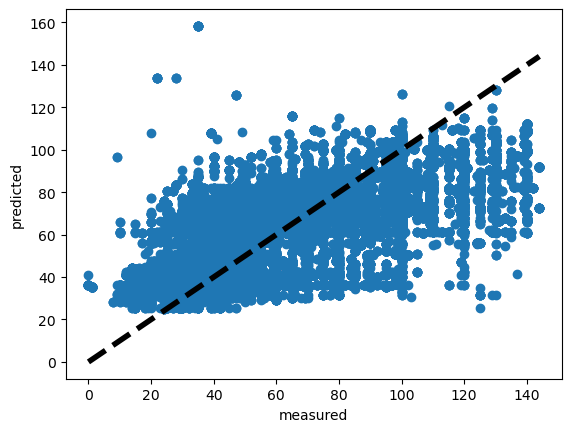

In [53]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [54]:
print(linreg.intercept_)
print(linreg.coef_)

-2098238679721.0156
[-9.16961726e-01 -1.63848404e+09 -1.63848403e+09  2.09987716e+12
  2.09987716e+12  2.09987716e+12  6.50973952e+00  4.67167177e+00
  5.76035575e+00]
